# Linear Regression Project

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting matplotlib inline for Jupyter Notebooks
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [5]:
customers = pd.read_csv('ecommerce customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [7]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [11]:
from scipy.stats import pearsonr
# Calculate R-value and p-value
r_value, p_value = pearsonr(customers['Time on Website'], customers['Yearly Amount Spent'])

# Create the jointplot
g = sns.jointplot(
    data=customers,
    x='Time on Website', 
    y='Yearly Amount Spent', 
    kind='reg'
)

# Add R-value and p-value as text
g.ax_joint.text(
    0.05, 0.95,  # Adjust the position as needed
    f'R: {r_value:.3e}\nP: {p_value:.3e}', 
    transform=g.ax_joint.transAxes,
    fontsize=12, 
    color='red'
)

Text(0.05, 0.95, 'R: -2.641e-03\nP: 9.530e-01')

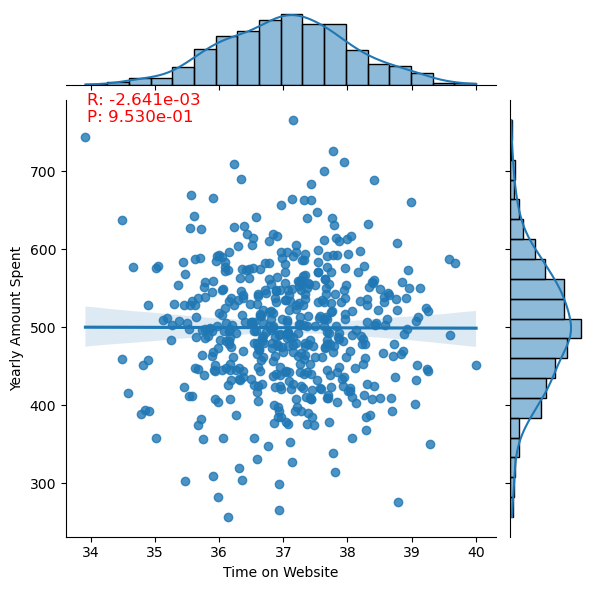

In [12]:
# Show the plot
plt.show()

**Do the same but with the Time on App column instead.**

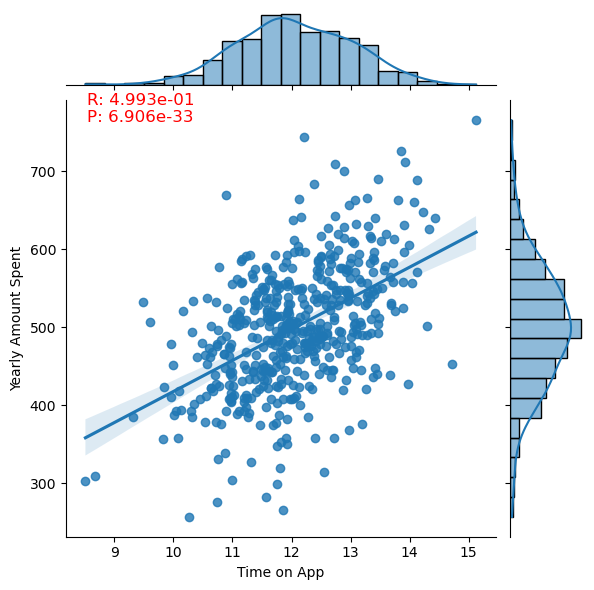

In [14]:
# Calculate R-value and p-value
r_value, p_value = pearsonr(customers['Time on App'], customers['Yearly Amount Spent'])

# Create the jointplot
g = sns.jointplot(
    data=customers, 
    x='Time on App', 
    y='Yearly Amount Spent', 
    kind='reg'
)

# Add R-value and p-value as text
g.ax_joint.text(
    0.05, 0.95,  # Adjust the position as needed
    f'R: {r_value:.3e}\nP: {p_value:.3e}', 
    transform=g.ax_joint.transAxes,
    fontsize=12, 
    color='red'
)
# Show the plot
plt.show()

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

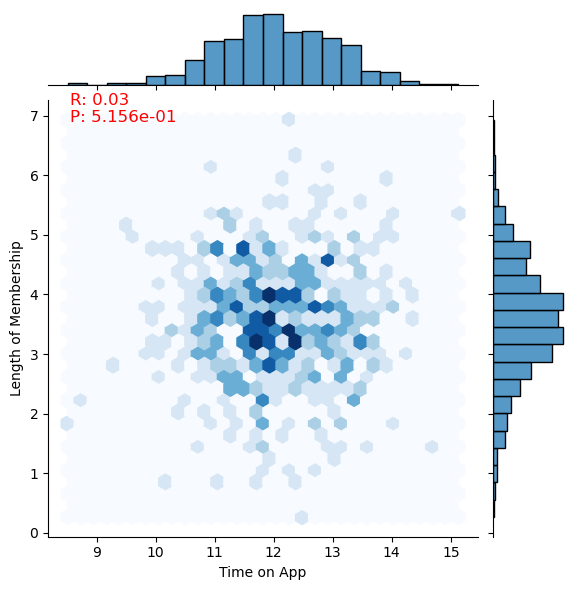

In [16]:
# Calculate R-value and P-value
r_value, p_value = pearsonr(customers['Time on App'], customers['Length of Membership'])

# Create the hex bin plot using jointplot
g = sns.jointplot(
    data=customers, 
    x='Time on App', 
    y='Length of Membership', 
    kind='hex', 
    gridsize=30,  # Adjust the bin size if needed
    cmap='Blues'
)

# Add R-value and P-value as text
g.ax_joint.text(
    0.05, 0.95,  # Position in normalized coordinates (0 to 1 scale)
    f'R: {r_value:.2f}\nP: {p_value:.3e}', 
    transform=g.ax_joint.transAxes,
    fontsize=12, 
    color='red'
)

# Show the plot
plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

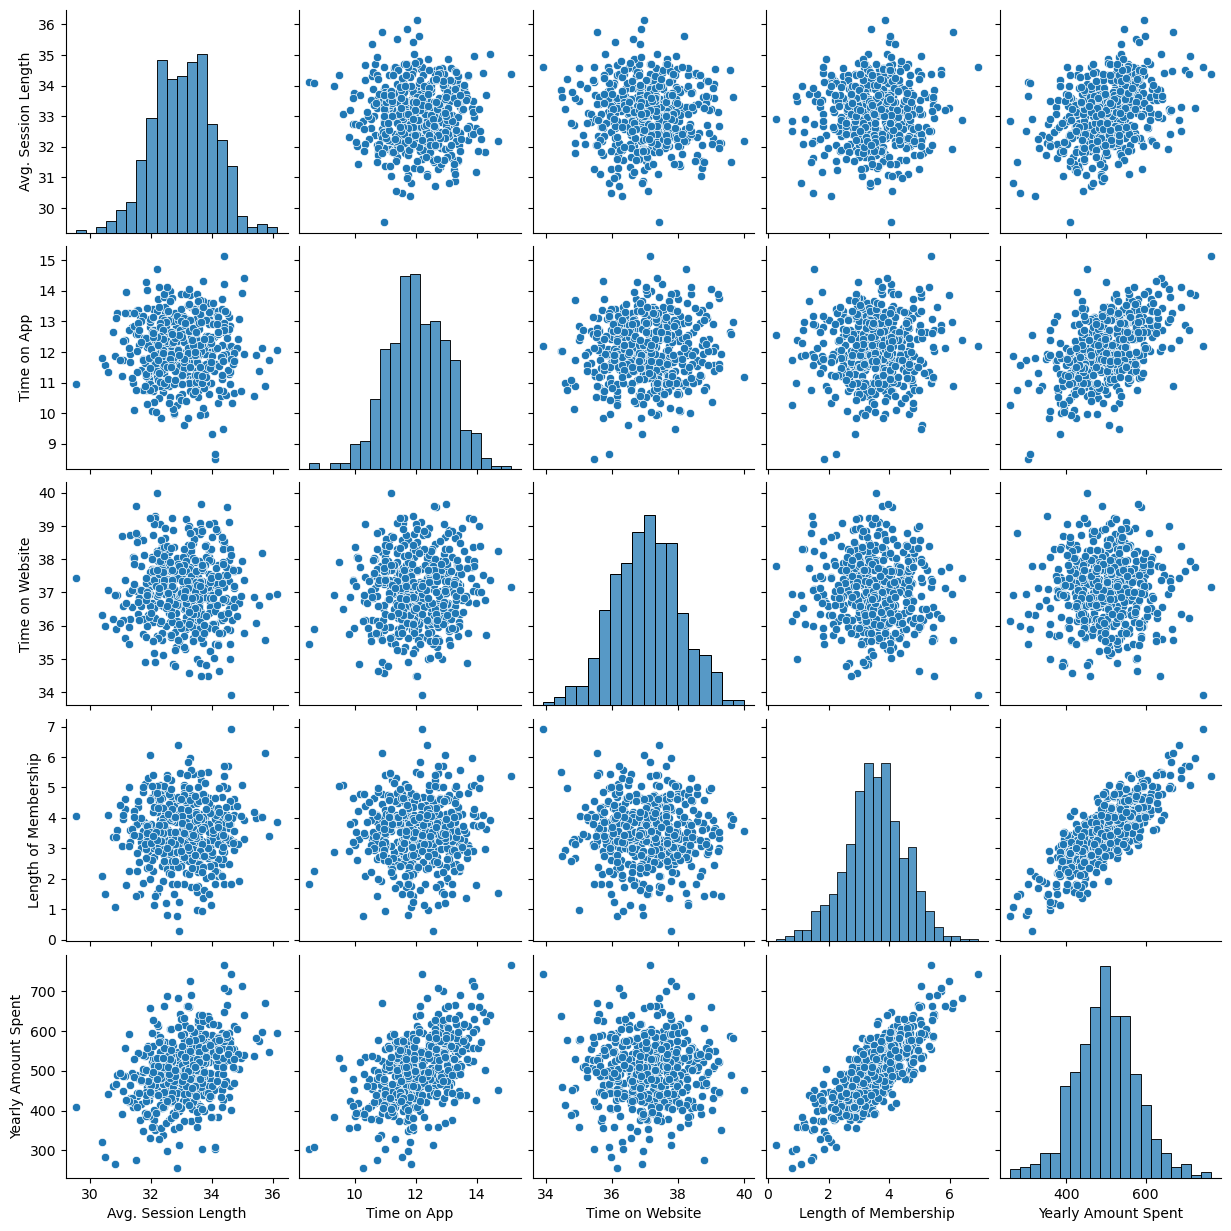

In [18]:
sns.pairplot(customers)
# Show the plot
plt.show()

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

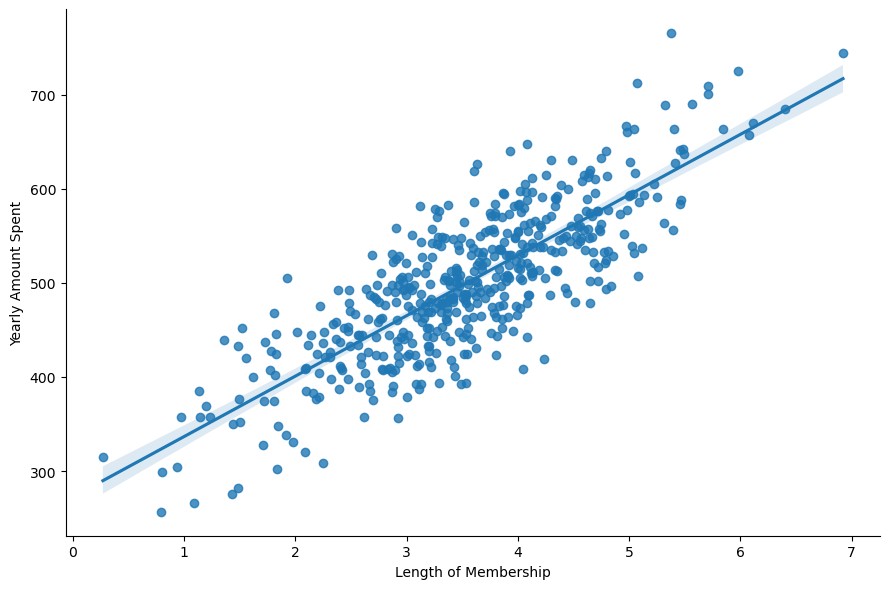

In [22]:
# Create an lmplot
sns.lmplot(
    data=customers, 
    x='Length of Membership', 
    y='Yearly Amount Spent', 
    height=6, 
    aspect=1.5
)

# Show the plot
plt.show()

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [24]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]  

In [25]:
y = customers['Yearly Amount Spent']  

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [30]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [32]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [36]:
coefficients = pd.DataFrame(
    lm.coef_, 
    X_train.columns, 
    columns=['Coefficient']
)
coefficients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [38]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

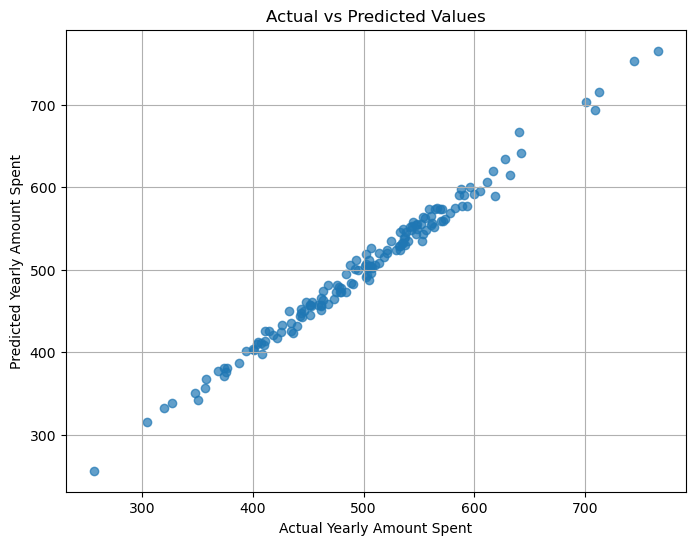

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 7.23
Mean Squared Error (MSE): 79.81
Root Mean Squared Error (RMSE): 8.93
R^2 Score: 0.99


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

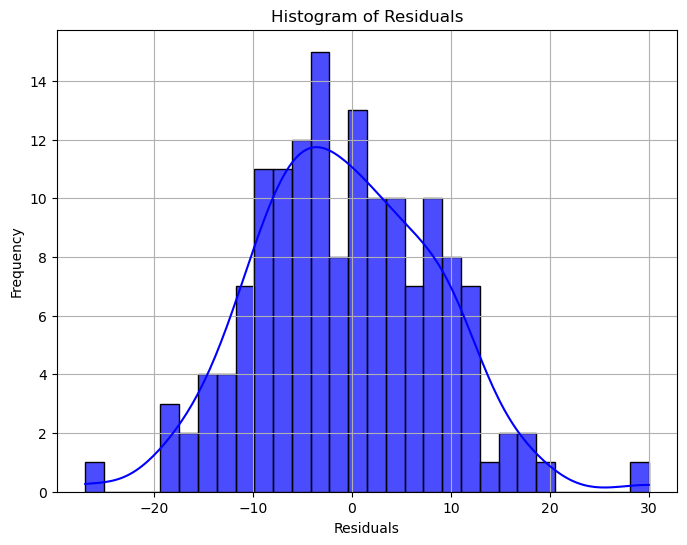

In [44]:
# Calculate residuals
residuals = y_test - predictions

# Plot the histogram of residuals using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [46]:
# Create a DataFrame with feature names and their corresponding coefficients
coefficients = pd.DataFrame(
    {
        'Feature': ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'],
        'Coefficient': lm.coef_
    }
)

# Display the DataFrame
print(coefficients)

                Feature  Coefficient
0   Avg. Session Length    25.981550
1           Time on App    38.590159
2       Time on Website     0.190405
3  Length of Membership    61.279097


**How can you interpret these coefficients?**

**Interpretation of Coefficients**:
* **Avg. Session Length** `25.98`: Each additional unit increases yearly spending by `$25.98`. Longer sessions positively impact spending.
* **Time on App** `38.59`: Each additional unit increases yearly spending by `$38.59`. The mobile app significantly drives revenue.
* **Time on Website** `0.19`: Each additional unit increases yearly spending by only `$0.19`, showing minimal impact.
* **Length of Membership** `61.28`: Each additional year increases yearly spending by `$61.28`, the strongest driver of revenue.

**Key Takeaways**:
* Focus on mobile app development and customer retention (length of membership).
* Website improvements are unlikely to yield significant returns.

**Do you think the company should focus more on their mobile app or on their website?**

The company should focus more on their mobile app rather than their website because:
* The Time on App has a much stronger impact on spending compared to the website.
* The website's negligible impact suggests that significant investments in website development may not yield a good return on investment.

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.